### K-Nearest Neighbours using TShirt size data

### Definition
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

It  is a supervised learning algorithm where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

#### The objective is to:
* Implement K-Nearest Neighbours Machine Learning algorithm using Scikit Learn on the TShirt dataset
* Normalise the Independent variables and split the data into training and testing
* Create a KNN model which will be trained and tested
* Evaluate the Model to know its efficiency in making predictions
* Search for a k that offers the optimum results

#### Processes required to achieve the objective

* Initial Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' amd 'info' 
* Data cleaning if necessary by removing redundant or empty data
* Data Visualisation (checking correlation) using matplotlib to create various plots 
* Normalise the Independent data
* Split the data into training and testing 
* Use plots to see the distribution of trained data and ascertain that data training has been achieved
* use sklearn to create the KNN Model
* Perform prediction
* Evaluate the model
* Try another k to compare results
* Remarks about observation 
* plot a general k and its corresponding accuracy results

### Initial Understanding of Data
The Dataset consists of 3 columns:

* Weight (in kgs)
* Height (in cm)
* Size in M and L

## Data Import

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [104]:
df = pd.read_csv("TShirt_size.csv")

## Data Understanding and Preprocessing

In [105]:
df.head()

,Height,Weight,TShirtSize
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [106]:
df['TShirtSize'].unique()

array(['M', 'L'], dtype=object)

In [107]:
df.head(20)

,Height,Weight,TShirtSize
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [108]:
X = df[['Height', 'Weight']] .values  #.astype(float)
X[0:5]

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60]], dtype=int64)

In [109]:
y = df['TShirtSize'].values
y[0:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

## Data Normalization

* Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [110]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.42749285, -1.69245584],
       [-1.42749285, -1.30188911],
       [-1.42749285,  0.26037782],
       [-0.9516619 , -1.30188911],
       [-0.9516619 , -0.91132238]])

## Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14, 2) (14,)
Test set: (4, 2) (4,)


# Classification

## K nearest neighbor (KNN): Classifier implementing the k-nearest neighbors vote.

In [112]:
from sklearn.neighbors import KNeighborsClassifier

### Training
* Let's start the algorithm with k=2 for now

In [113]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=2)

# Prediction

* We use the model in making predictions on the test set as follows:

In [114]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['L', 'M', 'L', 'L'], dtype=object)

# Accuracy evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [115]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8571428571428571
Test set Accuracy:  0.75


### Checking with k = 3

In [116]:
k = 3
neigh3 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat3 = neigh3.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh3.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))

Train set Accuracy:  0.9285714285714286
Test set Accuracy:  0.75


### Remarks
* Using a k value of 2 we have a very high accuracy for both Train about 93% and test set is 75%
* We realise that in increasing k to 3 the train accuracy remains the same and the same for test set
* A more complex dataset may be required to test the strength of this algorithm

### Which K is the optimum

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k and view the results on a graph.

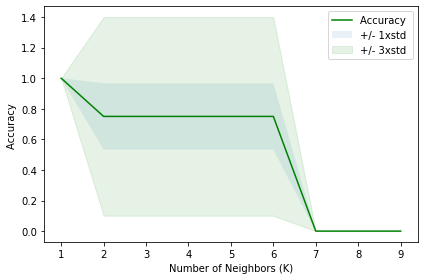

In [118]:
ks = 10
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Final Remarks
* We can see that the best k for such a small dataset is 1. K remains slightly high between 2 and 6 and then drops to bad results